<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 05 **
** ┗ Quality important factor analysis **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Quality Important Search」
* 🥈SESSION 2 -「Important use of linear regression」
* 🥇SESSION 3 -「ML Utilization Quality Important Pression」


In [1]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/05_Analysis of Key Quality Factors')
os.getcwd()

'/content/drive/MyDrive/DA portfolio/DA_colab/05_Analysis of Key Quality Factors'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🍷💰 (Quality Manager, Production Manager)

``
A factory produces WINE.Good quality WINE can be sold to the market at a high unit price.The WINE produced in the factory is a grade of 1 ~ 9 grades,
Grade 7 or higher is the most premium WINE.You need to produce as much WINE with 7 or more WINEs to leave operating profit.WINE affects
We will check the main process variables and create a WINE of 7 or more through the management of process variables.

``


> ** Looking at the data **

* It is a process data recorded for quality and quality inspection of the produced wine.
* Data specification ⬇

| Fixed Acidity | Volatile Acidity | Citric Acid | Residual SUGAR | Chlorides | Free sulfur dioxide | Total sulfurDioxide | density | PH | Sulphates | alcohol | Quality |
| ----: | ---: | ---: | ---: | ---: | ---: | ---: ---: ---: ----: ----: ----:-|-|-|-| ---: | ---: |
| Volatile Award | Citr Mountain | Remnants | Chloride | Independent sulfur dioxide | Density | Density | Hydrogen ion concentration |


In [3]:
import pandas as pd
df1=pd.read_csv('chapter05_winequality_red.csv', sep=';')
df2=pd.read_csv('chapter05_winequality_white.csv', sep=';')

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Lack of production of premium WINE over 7 grades
``

> ** Expected effect **

``
▶ Increased production profit, increase in operating profit for premium WINE over 7 grades
``

> ** Solution **

``
▶ Production of premium WINE through factor derivation and process management that affects WINE quality
▶ Session 1 🥉
-Search for quality important factors
▶ Session 2 🥈
-Gathematics through multiple regression analysis
▶ Session 3 🥇
-ML algorithm utilization quality forecast
``

> ** Performance measurement **

``
▶ Comparison of process variable Control before/after premium WINE production
``

> ** Public application **

``
▶ Analysis of correlation between important process variables and quality derived through Model
▶ Production of premium WINE through the management of the relevant process variables
``

> ** Main code preview **

``
▶ Session 1 → np.where (), value_counts (), SNS.Heatmap ()
▶ Session 2 → Linearrregression (), Mean_absolute_error, R2_SCORE, MLR.COEF_
▶ Session 3 → LightGBM, Classification_report, CLF.FEATURE_IMPORTANCE ()
``


## ** 🥉Session 1 **
** ┗ Search for quality important factors **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [4]:
# ▶ Data type confirmation
# ▶ 6497 row, 12 cola
print('df', df.shape)

df (6497, 12)


In [5]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [6]:
# ▶ Check NULL value
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# ▶ Outlier confirmation, negative value check
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# ▶ The 7, 8, 9 grades of wines are significantly small
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [9]:
# ▶ Define WINE as a premium water in grade 7 or higher and create a target data
import numpy as np
df['target'] = np.where(df['quality']>6, 1, 0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [10]:
# ▶ Change to Classification Problem to predict Premium WINE
df['target'].value_counts()

,count
target,
0,5220
1,1277


In [11]:
1277/(1277+5220)

0.19655225488687086

### · Search for quality important
---
* Preliminary exploration of important factors through data EDA


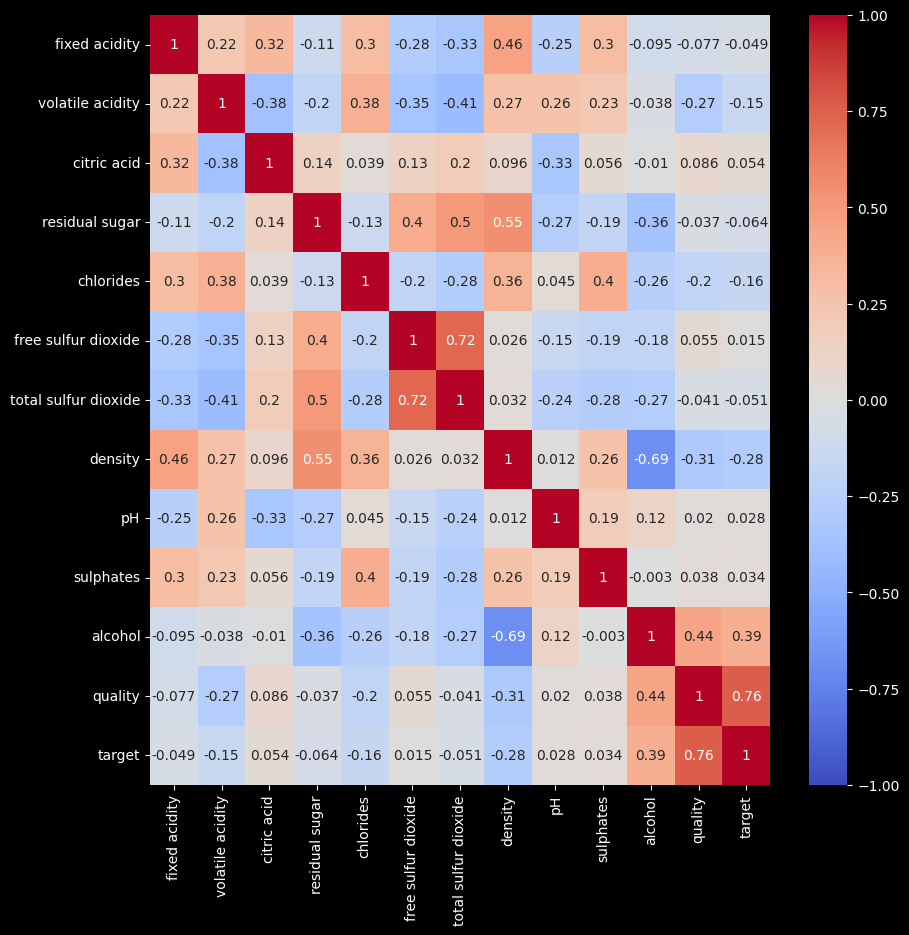

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

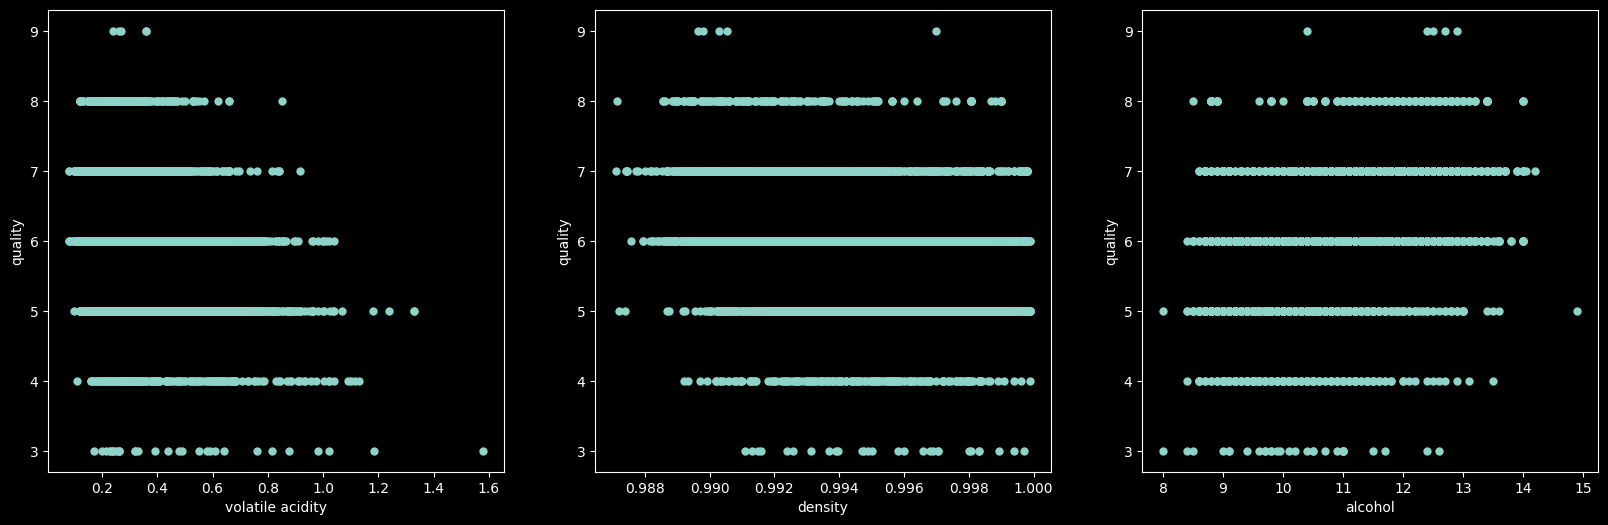

In [13]:
# ▶ Correlation (0.2) or higher correlation and exploration of variables
# ▶ As the grade goes up, the tendency to lower the Volatile Acidity

fig, axes = plt.subplots(1, 3)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0]);
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[1]);
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[2]);
plt.gcf().set_size_inches(20, 6)

## ** 🥈Session 2 **
** ┗ Important use of linear returns **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [14]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions
* In the linear regression practice, the existing Quality predicts without using the target defined target.


In [15]:
# ▶ Use of LR (linear reign) model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [16]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5729338429685676
r2_score(r2):  0.28601865380861813

mae_test(mae):  0.5591778632202828
r2_score(r2):  0.30379864439008997


In [17]:
# ▶ Expressing the actual value and prediction value
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,6,5.906277,0.093723
1,6,5.625343,0.374657
2,5,4.994456,0.005544
3,5,5.296299,-0.296299
4,6,6.667894,-0.667894


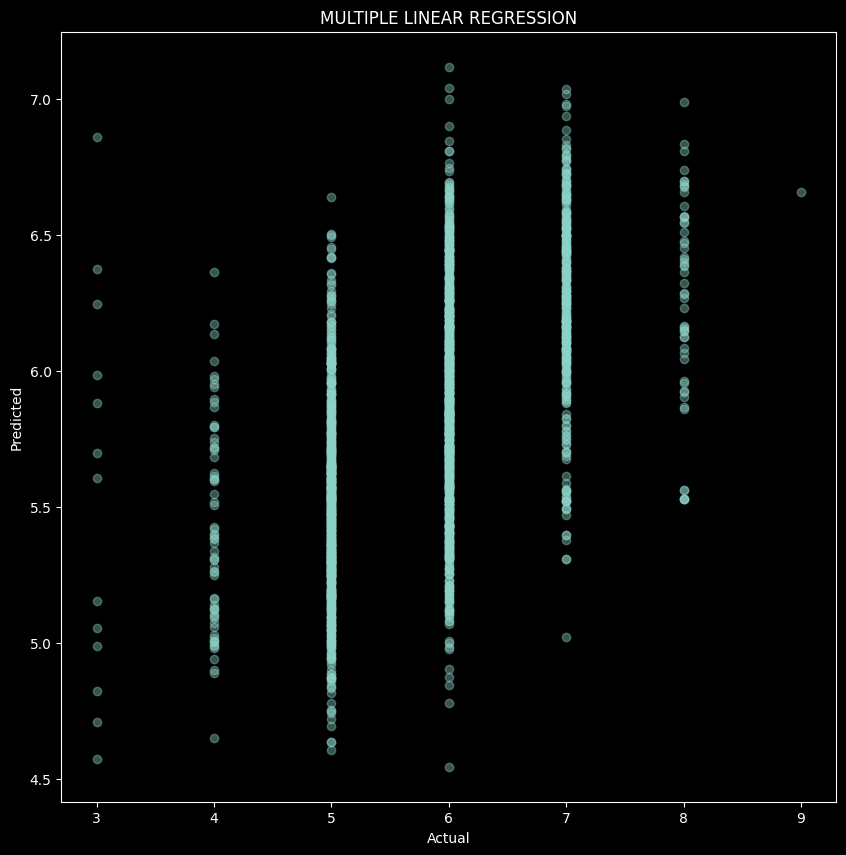

In [18]:
# ▶ Express how well the predictive model explains the real problem as a graph
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gcf().set_size_inches(10, 10)
plt.show()

In [19]:
# ▶ Expressing the actual value and predictive value (converted to integer value)
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(df_result['Predicted Values'],0))})
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
105,6,6.0,0.0
1339,6,6.0,0.0
782,5,5.0,0.0
2302,5,5.0,0.0
2984,6,7.0,-1.0


In [20]:
abs(df_result['diff']).mean()

np.float64(0.5107692307692308)

In [21]:
y_pred_test

array([5.9062766 , 5.6253431 , 4.9944562 , ..., 6.97475762, 6.27640233,
       6.52527035])

In [22]:
np.round(y_pred_test, 0).astype(int)

array([6, 6, 5, ..., 7, 6, 7])

In [23]:
# ▶ MAE for modified Y values
pred_test = np.round(y_pred_test, 0).astype(int)
mae_test = mean_absolute_error(y_test, pred_test )
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test,np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_test(mae):  0.5107692307692308
r2_score(r2):  0.17693169676957965


### · Confirmation of multiple regression correlation coefficient
---
* Advantages of regression: can be explained to some extent with coefficients.


In [24]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef

,col,coef
0,fixed acidity,0.081202
1,volatile acidity,-1.256219
2,citric acid,-0.102907
3,residual sugar,0.046466
4,chlorides,-0.314688
5,free sulfur dioxide,0.006517
6,total sulfur dioxide,-0.002595
7,density,-62.692923
8,pH,0.506958
9,sulphates,0.738969


In [25]:
# ▶ It is difficult to interpret the results of the multi -sanctions and the result.
# ▶ The regression coefficient, which is the result of the analysis, is unstable, and the impact of the regression coefficient on the dependent variable of the variable cannot be correctly explained.
df_corr = df.corr()
df_corr = df_corr[(abs(df_corr) > 0.5) & (df_corr != 1)]
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN,NaN,-0.686745,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# ▶ (density, residual sugar) → 0.552517
# ▶ (total sulfur dioxide, free sulfur dioxide) → 0.720934
# ▶ (pH, alcohol) → 0.720934

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [27]:
# ▶ Use of LR (linear reign) model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [28]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5768991132669263
r2_score(r2):  0.2700032363519642

mae_test(mae):  0.5735372360434718
r2_score(r2):  0.2975470151931834


In [29]:
# ▶ The sign of the regression coefficient of density has changed
df_coef_2 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_2

,col,coef
0,fixed acidity,-0.009011
1,volatile acidity,-1.434054
2,citric acid,-0.161496
3,chlorides,-0.674288
4,free sulfur dioxide,0.003035
5,density,34.972897
6,sulphates,0.540972
7,alcohol,0.375417


In [30]:
# ▶ Data copy()
df_sc = df.copy()

In [31]:
# ▶ MINMAX_SCALE standardization

from sklearn.preprocessing import minmax_scale

for i in list(df.columns[0:11]) :
  df_sc[i] = minmax_scale(df_sc[i], axis=0, copy=True)

df_sc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


In [32]:
# ▶ (density, residual sugar) → 0.552517
# ▶ (total sulfur dioxide, free sulfur dioxide) → 0.720934
# ▶ (pH, alcohol) → 0.720934

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df_sc.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df_sc['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [33]:
# ▶ Use of LR (linear reign) model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [34]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5771891479438637
r2_score(r2):  0.26958666168827117

mae_test(mae):  0.5734576619610683
r2_score(r2):  0.29829198101406895


In [35]:
# ▶ Easy to interpret through scaling
df_coef_3 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_3

,col,coef
0,fixed acidity,0.010374
1,volatile acidity,-2.307373
2,citric acid,-0.387981
3,chlorides,-0.323103
4,free sulfur dioxide,0.908875
5,density,1.747864
6,sulphates,0.895772
7,alcohol,2.574244


## ** 🥇Session 3 **
** ┗ ML Use Quality Important Derivation **
---


In [36]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [37]:
# ▶ Feature (x) and Y data to learn modeling
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

# ▶ Data set load
X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

# ▶train/test split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3)

# ▶ Convert data sets to appropriate LGB format
d_train = lgb.Dataset (x_train, label = y_train)

### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [38]:
# ▶ setting the parameters
params = {}
params [ 'learning_rate'] = 0.02
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for binary-class
params [ 'max_depth'] = 3
params [ 'num_leaves' ] = 6
params ['seed'] = 23456
# ▶ Model learning
clf = lgb.train (params, d_train, 1000) # Model training at EPOCS


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 920, number of negative: 3627
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1493
[LightGBM] [Info] Number of data points in the train set: 4547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202331 -> initscore=-1.371787
[LightGBM] [Info] Start training from score -1.371787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [39]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0.79085064, 0.03387214, 0.08418486, ..., 0.62601323, 0.15727071,
       0.18827453])

In [40]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3627
           1       0.81      0.54      0.65       920

    accuracy                           0.88      4547
   macro avg       0.85      0.76      0.79      4547
weighted avg       0.88      0.88      0.87      4547

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1593
           1       0.67      0.47      0.55       357

    accuracy                           0.86      1950
   macro avg       0.78      0.71      0.74      1950
weighted avg       0.85      0.86      0.85      1950



### · Identify important variables
---
* Finding important variables through feature IMP analysis


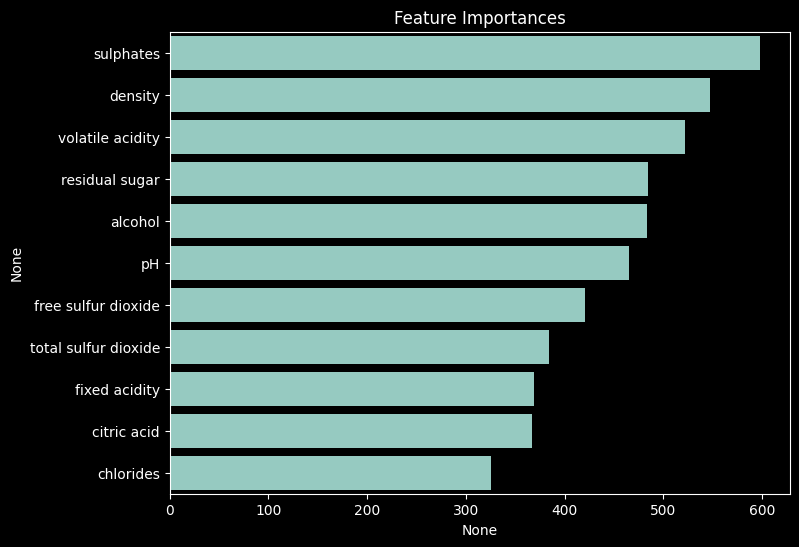

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Model Save and Read
---
* Save and load the final model


In [42]:
import pickle
# Model storage
saved_model = pickle.dumps(clf)

# Model READ
clf_from_pickle = pickle.loads(saved_model)